<a href="https://colab.research.google.com/github/yun-aha/GSTEC/blob/main/210714.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 딥러닝 & 강화학습

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#좀 더 큰 데이터를 이용해보기
df_dataset = pd.read_csv('/content/faults.csv')
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              1941 non-null   int64  
 1   X_Maximum              1941 non-null   int64  
 2   Y_Minimum              1941 non-null   int64  
 3   Y_Maximum              1941 non-null   int64  
 4   Pixels_Areas           1941 non-null   int64  
 5   X_Perimeter            1941 non-null   int64  
 6   Y_Perimeter            1941 non-null   int64  
 7   Sum_of_Luminosity      1941 non-null   int64  
 8   Minimum_of_Luminosity  1941 non-null   int64  
 9   Maximum_of_Luminosity  1941 non-null   int64  
 10  Length_of_Conveyer     1941 non-null   int64  
 11  TypeOfSteel_A300       1941 non-null   int64  
 12  TypeOfSteel_A400       1941 non-null   int64  
 13  Steel_Plate_Thickness  1941 non-null   int64  
 14  Edges_Index            1941 non-null   float64
 15  Empt

In [ ]:
df_dataset.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,1687,1,0,80,0.0498,0.2415,0.1818,0.0047,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,1687,1,0,80,0.7647,0.3793,0.2069,0.0036,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,1623,1,0,100,0.9710,0.3426,0.3333,0.0037,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,1353,0,1,290,0.7287,0.4413,0.1556,0.0052,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,1353,0,1,185,0.0695,0.4486,0.0662,0.0126,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0


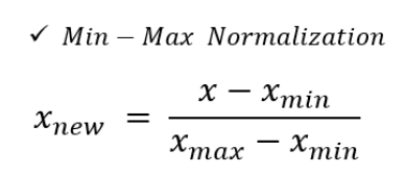

In [ ]:
faults_norm = (df_dataset - df_dataset.min()) / (df_dataset.max() - df_dataset.min())

In [ ]:
faults_norm.describe()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
count,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000
mean,0.334977,0.359254,0.126645,0.126648,0.012393,0.010515,0.004516,0.017778,0.416496,0.431452,0.409454,0.400309,0.599691,0.148991,0.333315,0.438821,0.567175,0.036438,0.604838,0.803985,0.575734,0.448807,0.373115,0.329507,0.541831,0.528699,0.529422,0.081401,0.097888,0.201443,0.037094,0.028336,0.207110,0.346728
std,0.305390,0.291180,0.136706,0.136707,0.033858,0.028832,0.023496,0.044197,0.158297,0.086532,0.254987,0.490087,0.490087,0.211869,0.301157,0.145420,0.273327,0.067430,0.246831,0.246189,0.482352,0.161577,0.173673,0.106686,0.252619,0.090656,0.385303,0.273521,0.297239,0.401181,0.189042,0.165973,0.405339,0.476051
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.029912,0.110006,0.035786,0.035788,0.000537,0.001244,0.000661,0.000800,0.310345,0.402778,0.231041,0.000000,0.000000,0.000000,0.060691,0.334569,0.355954,0.005833,0.403206,0.576293,0.000000,0.332459,0.252064,0.253411,0.331719,0.489884,0.146652,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.255132,0.270919,0.092244,0.092244,0.001127,0.002297,0.001322,0.001635,0.443350,0.416667,0.241623,0.000000,1.000000,0.115385,0.228396,0.436593,0.551881,0.009835,0.631088,0.944725,1.000000,0.397239,0.315567,0.310470,0.547839,0.527666,0.439614,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.617595,0.624927,0.167658,0.167658,0.005372,0.007849,0.004518,0.007140,0.522167,0.476852,0.746032,1.000000,1.000000,0.153846,0.576568,0.531412,0.816678,0.025160,0.797078,1.000000,1.000000,0.535339,0.439039,0.406791,0.757855,0.568129,0.999773,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
faults_shuffle = faults_norm.sample(frac = 1)
print(faults_shuffle[:5])

      X_Minimum  X_Maximum  Y_Minimum  ...  Dirtiness  Bumps  Other_Faults
1895   0.453372   0.466355   0.172075  ...        0.0    0.0           1.0
800    0.285044   0.286132   0.124475  ...        0.0    0.0           0.0
855    0.363050   0.366296   0.162312  ...        1.0    0.0           0.0
1577   0.380645   0.384435   0.069716  ...        0.0    0.0           1.0
1870   0.786510   0.822118   0.214732  ...        0.0    0.0           1.0

[5 rows x 34 columns]


In [ ]:
faults_np = faults_shuffle.to_numpy()
print(type(faults_np))

<class 'numpy.ndarray'>


In [ ]:
train_ratio = 0.9
input_cnt = 27
output_cnt = 7

In [ ]:
train_idx = int(len(faults_np)*train_ratio)
print(train_idx)

1746


In [ ]:
train_X, train_Y = faults_np[:train_idx, :-output_cnt], faults_np[ :train_idx, -output_cnt:]
test_X, test_Y = faults_np[train_idx: , :-output_cnt], faults_np[train_idx:, -output_cnt:]

In [ ]:
print(train_X.shape)
print(train_Y.shape)
print('------------------------------')
print(test_X.shape)
print(test_Y.shape)

(1746, 27)
(1746, 7)
------------------------------
(195, 27)
(195, 7)


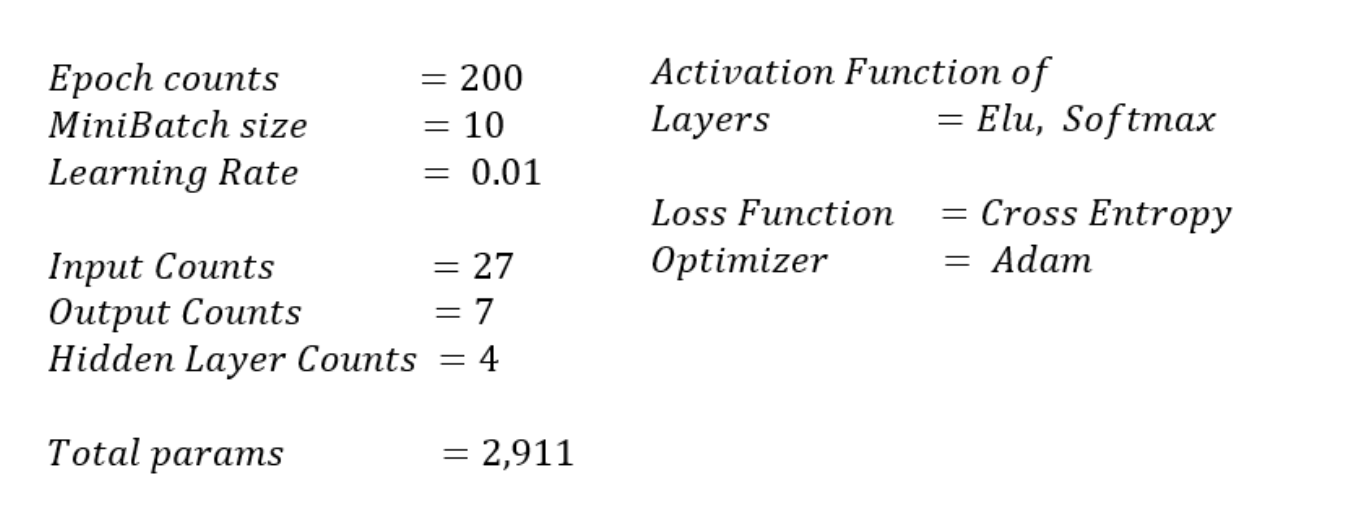

In [ ]:
multi_layer_model = tf.keras.Sequential([
                                         tf.keras.layers.Dense(units=48, activation='elu',
                                                               input_shape = (27,)),
                                         tf.keras.layers.Dense(units=24, activation='elu'),
                                         tf.keras.layers.Dense(units=12, activation='elu'),
                                         tf.keras.layers.Dense(units=7, activation='softmax')
])

In [ ]:
multi_layer_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 48)                1344      
_________________________________________________________________
dense_13 (Dense)             (None, 24)                1176      
_________________________________________________________________
dense_14 (Dense)             (None, 12)                300       
_________________________________________________________________
dense_15 (Dense)             (None, 7)                 91        
Total params: 2,911
Trainable params: 2,911
Non-trainable params: 0
_________________________________________________________________


In [ ]:
multi_layer_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='categorical_crossentropy')

In [ ]:
history_2 = multi_layer_model.fit(train_X, train_Y, batch_size = 10, epochs = 200)


Epoch 1/200
175/175 [==============================] - 1s 1ms/step - loss: 1.1996
Epoch 2/200
175/175 [==============================] - 0s 1ms/step - loss: 0.9574
Epoch 3/200
175/175 [==============================] - 0s 1ms/step - loss: 0.9037
Epoch 4/200
175/175 [==============================] - 0s 1ms/step - loss: 0.8138
Epoch 5/200
175/175 [==============================] - 0s 1ms/step - loss: 0.7830
Epoch 6/200
175/175 [==============================] - 0s 2ms/step - loss: 0.7659
Epoch 7/200
175/175 [==============================] - 0s 1ms/step - loss: 0.7510
Epoch 8/200
175/175 [==============================] - 0s 1ms/step - loss: 0.7278
Epoch 9/200
175/175 [==============================] - 0s 1ms/step - loss: 0.7143
Epoch 10/200
175/175 [==============================] - 0s 1ms/step - loss: 0.7092
Epoch 11/200
175/175 [==============================] - 0s 1ms/step - loss: 0.7244
Epoch 12/200
175/175 [==============================] - 0s 1ms/step - loss: 0.7175
Epoch 13/200


In [ ]:
multi_layer_model.evaluate(test_X, test_Y)

7/7 [==============================] - 0s 2ms/step - loss: 1.0461


1.0461103916168213

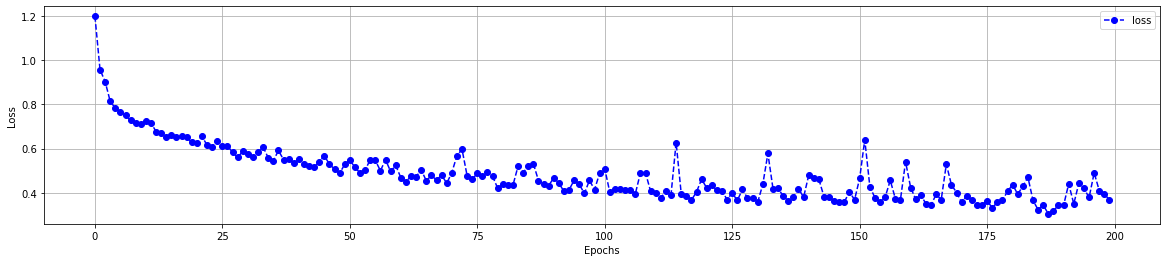

In [ ]:
plt.figure(figsize = (20,4))
plt.plot(history_2.history['loss'], 'b--o', label = 'loss')
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [ ]:
pred_Y = multi_layer_model.predict(test_X)
print('pred_Y : ', pred_Y)

pred_Y :  [[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  9.3012167e-36 1.0000000e+00]
 [1.6365757e-32 2.9173873e-26 1.0000000e+00 ... 0.0000000e+00
  1.2734159e-15 2.9528123e-11]
 [1.1250347e-02 4.2934110e-04 2.0507561e-05 ... 5.2115342e-07
  4.7835982e-01 5.0991917e-01]
 ...
 [6.0651052e-01 9.0350285e-02 1.1247980e-03 ... 2.0681384e-03
  2.6560614e-01 3.4303796e-02]
 [5.8957200e-02 7.4525474e-04 5.0336341e-05 ... 2.7689042e-05
  3.8521034e-01 5.5491674e-01]
 [9.9495006e-01 2.2954692e-12 6.0291389e-10 ... 3.4699382e-10
  1.4840999e-05 4.9143829e-03]]


In [ ]:
pred_Y = np.argmax(pred_Y, axis=1)
print(pred_Y)

[6 2 6 6 2 5 5 5 6 0 5 3 6 1 6 6 5 6 5 5 6 6 2 5 0 6 5 2 5 0 3 2 6 2 6 5 6
 6 2 5 4 1 5 5 5 5 0 5 6 0 2 5 6 5 1 3 5 6 6 5 6 5 5 1 6 2 5 4 6 2 2 2 2 6
 1 6 5 6 2 6 6 2 3 5 5 2 2 6 1 2 0 5 5 2 6 5 5 6 6 6 6 6 2 2 0 2 2 6 5 6 4
 5 2 3 5 0 0 1 5 5 5 1 6 2 2 6 5 6 6 6 6 6 2 6 4 1 0 5 1 1 6 1 6 5 4 5 0 4
 5 6 6 5 5 6 2 2 6 5 2 1 2 2 2 5 6 6 2 6 6 6 1 6 5 0 2 1 5 2 6 5 2 2 6 3 2
 2 6 4 5 6 5 5 0 6 0]


In [ ]:
test_Y = np.argmax(test_Y, axis = 1)
print(test_Y)

[6 2 6 6 2 5 5 6 5 0 5 6 6 1 6 5 5 6 5 5 0 1 1 5 0 6 0 2 5 0 3 2 6 6 5 5 1
 5 2 6 0 1 6 6 6 5 0 2 6 6 2 5 6 5 1 3 5 1 5 5 6 5 5 1 6 2 5 4 6 2 2 2 2 0
 1 1 6 6 2 6 6 2 3 5 6 2 2 5 1 2 6 5 5 2 6 6 6 6 6 6 6 6 6 2 6 2 2 6 5 2 4
 5 2 3 5 0 0 6 5 6 6 1 6 2 2 5 6 0 5 6 6 6 6 6 4 1 0 5 1 1 0 1 0 5 6 6 0 6
 5 6 6 5 3 5 2 6 6 5 2 1 2 2 2 6 6 5 2 6 6 5 1 5 5 6 2 1 5 6 6 6 2 2 6 3 2
 2 1 6 5 6 5 5 0 6 6]


In [ ]:
acc = np.mean(np.equal(pred_Y, test_Y))

In [ ]:
print("Multi_layer_model ACC : {} %".format(np.round(acc * 100,3)))

Multi_layer_model ACC : 70.256 %


### abalon 데이터

1.

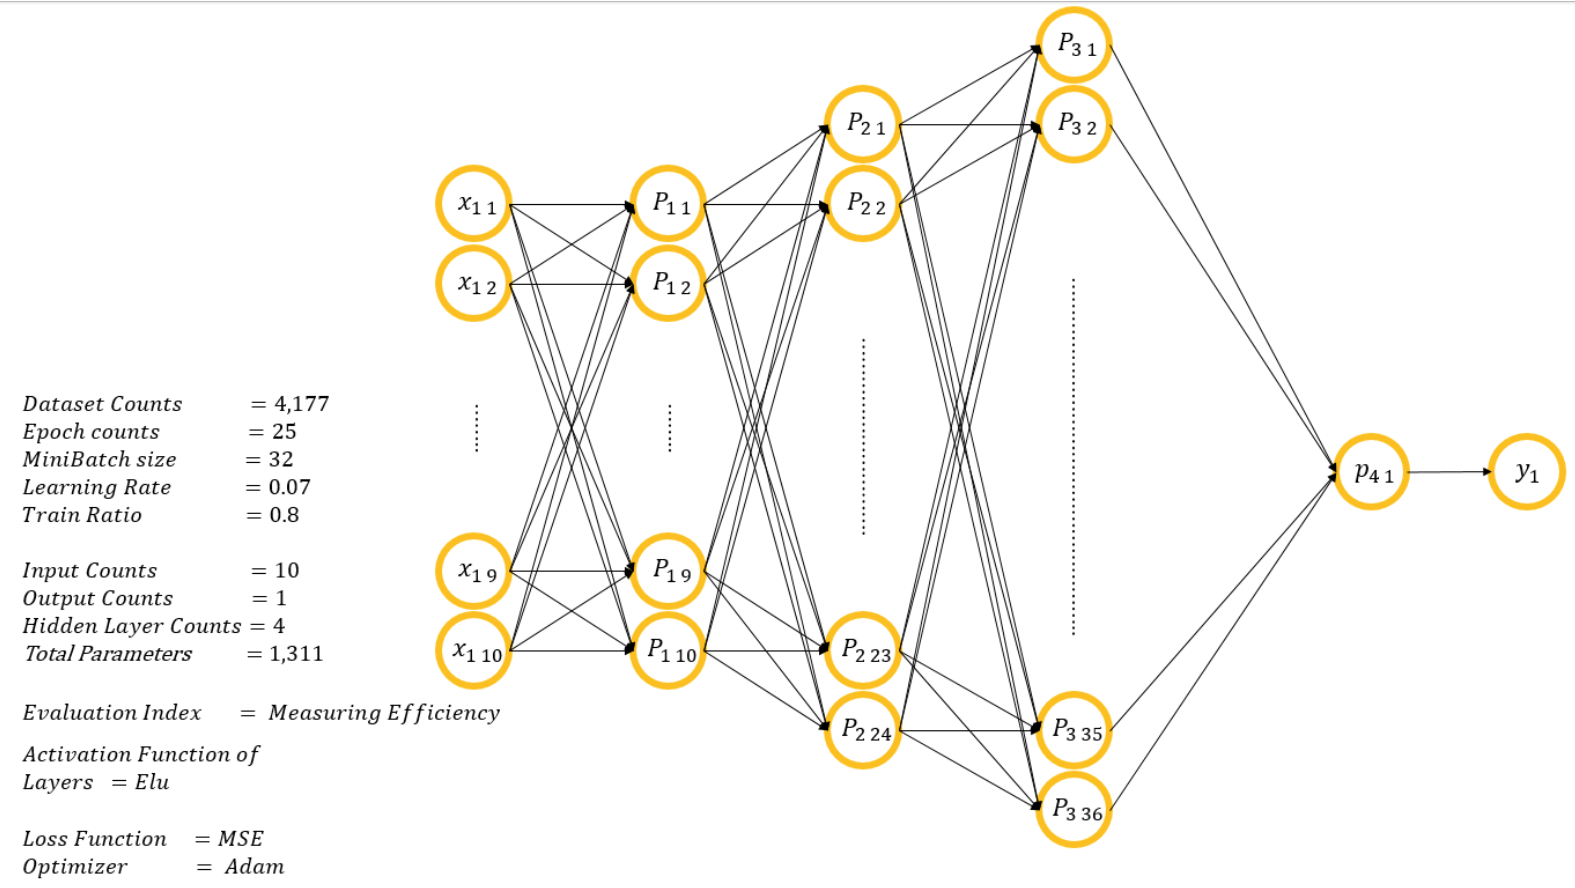

2.

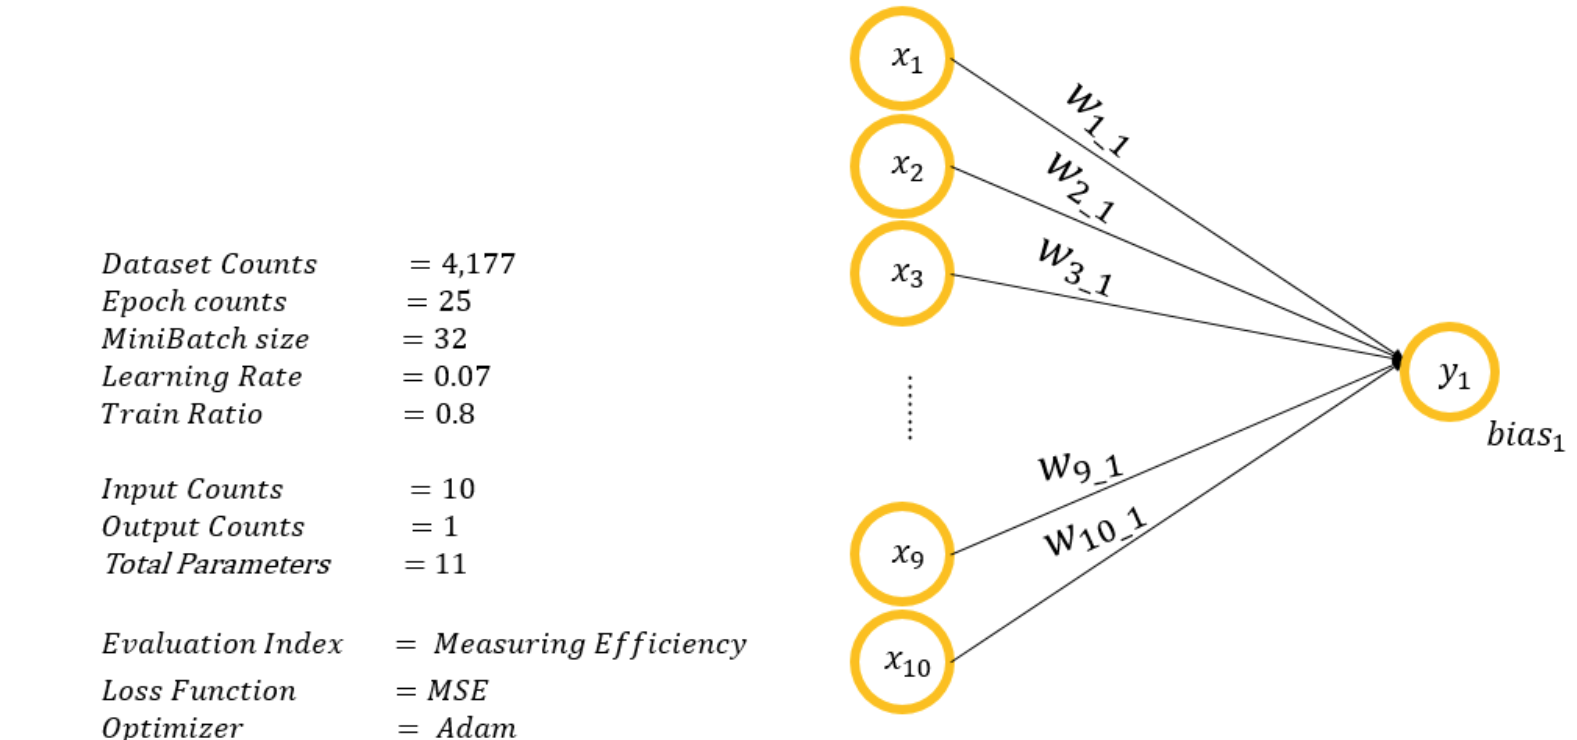

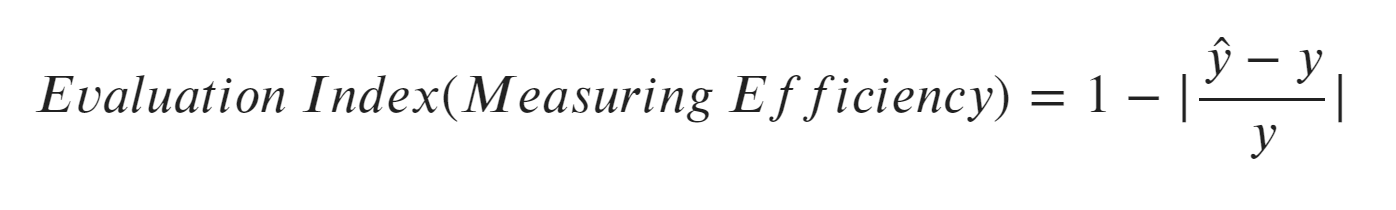

정규화함수

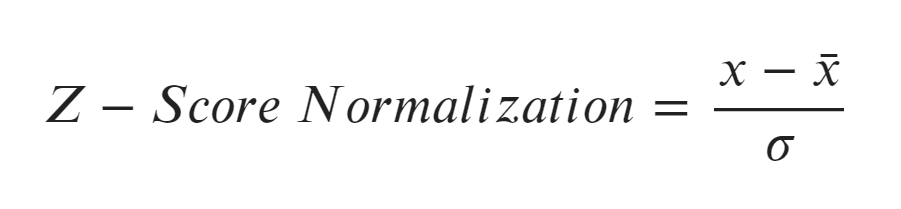

In [ ]:
df = pd.read_csv('/content/abalone.csv')
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


# 2. 머신러닝

In [ ]:
!apt -qq -y install fonts-nanum
 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()
 
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
 
# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [ ]:
!pip install mglearn

     |████████████████████████████████| 542kB 19.0MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=eb20b09196da8cd4348557cef66537d5056fb34df71ea72755b810f928d254c4
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
print(cancer.keys())
print(cancer.data.shape)
# print(cancer.DESCR)   #description

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
(569, 30)


In [ ]:
import numpy as np

# 양성과 악성 데이터의 수
# zip() : 2개의 데이터를 연결
# bincount() : 클래스별 개수를 반환 #numpy
for n, v in zip(cancer.target_names, np.bincount(cancer.target)):
  print({n:v})

#2. 데이터프레임으로 바꿔서 valuecount하는 방법을 더 많이 쓰긴 함.

{'malignant': 212}
{'benign': 357}


In [ ]:
# 특성의 명칭
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
# 훈련 데이터와 테스트 데이터 분리
# stratify: default=None 입니다. classification을 다룰 때 매우 중요한 옵션값입니다. 
# stratify 값을 target으로 지정해주면 
# 각각의 class 비율(ratio)을 train / validation에 유지해 줍니다. 
# (한 쪽에 쏠려서 분배되는 것을 방지합니다) 만약 이 옵션을 지정해 주지 않고
#  classification 문제를 다룬다면, 성능의 차이가 많이 날 수 있습니다.

X = cancer.data
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

X_train.shape, X_test.shape

((426, 30), (143, 30))

In [ ]:
np.bincount(y_train), np.bincount(y_test), np.bincount(cancer.target)

(array([159, 267]), array([53, 90]), array([212, 357]))

과대적합과 과소적합의 특징을 발견 (이웃의 수가 적을수록 모델이 복잡해지므로 그래프가 수평으로 뒤집힌 형태가 나타남) <br>
이웃의 수가 하나일 때 훈련 데이터에 대한 예측이 완벽하나, 이웃의 수가 늘어나면 모델은 단순해지고 훈련 데이터의 정확도는 줄어든다.

정확도가 가장 좋을 때는? -> 중간정도인 6개를 사용했을 경우

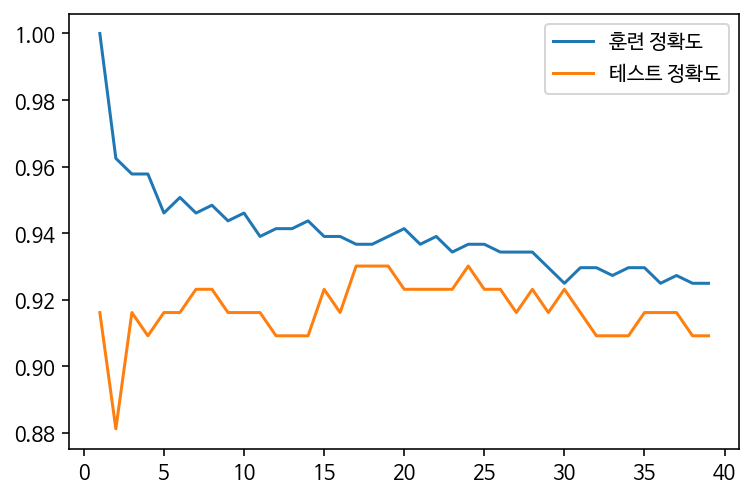

In [ ]:
train_acc = []
test_acc = []

n_neighbors = range(1,40)

for n in n_neighbors:
  model = KNeighborsClassifier(n_neighbors=n)
  model.fit(X_train, y_train)
  model.score(X_train, y_train)
  train_acc.append(model.score(X_train, y_train))
  test_acc.append(model.score(X_test, y_test))

plt.plot(n_neighbors, train_acc, label = '훈련 정확도')
plt.plot(n_neighbors, test_acc, label = '테스트 정확도')
plt.legend()
plt.show()

### K-NN 회귀

k-NN을 회귀에 사용한 경우
- 여러 개의 최근접 이웃을 사용할 경우에는 이웃 간의 평균이 예측 <br> (분류에서는 이웃의 레이블 개수를 확인해서 다수결로 정했지만, 회귀에서는 이웃들의 평균을 계산한다는 점이 차이)

- 분류는 모델과 비교하여 유사한 데이터의 개수(불연속)로 판단한다면 회귀는 데이터의 평균유사도 (연속적인)와 같은 수치로 판단

Classification(분류)는 연속적이지 않은 레이블, 다시 말해 ‘무엇’인지를 예측하지만, 회귀(Regression)는 연속된 수치, 즉 ‘얼마나’를 예측

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


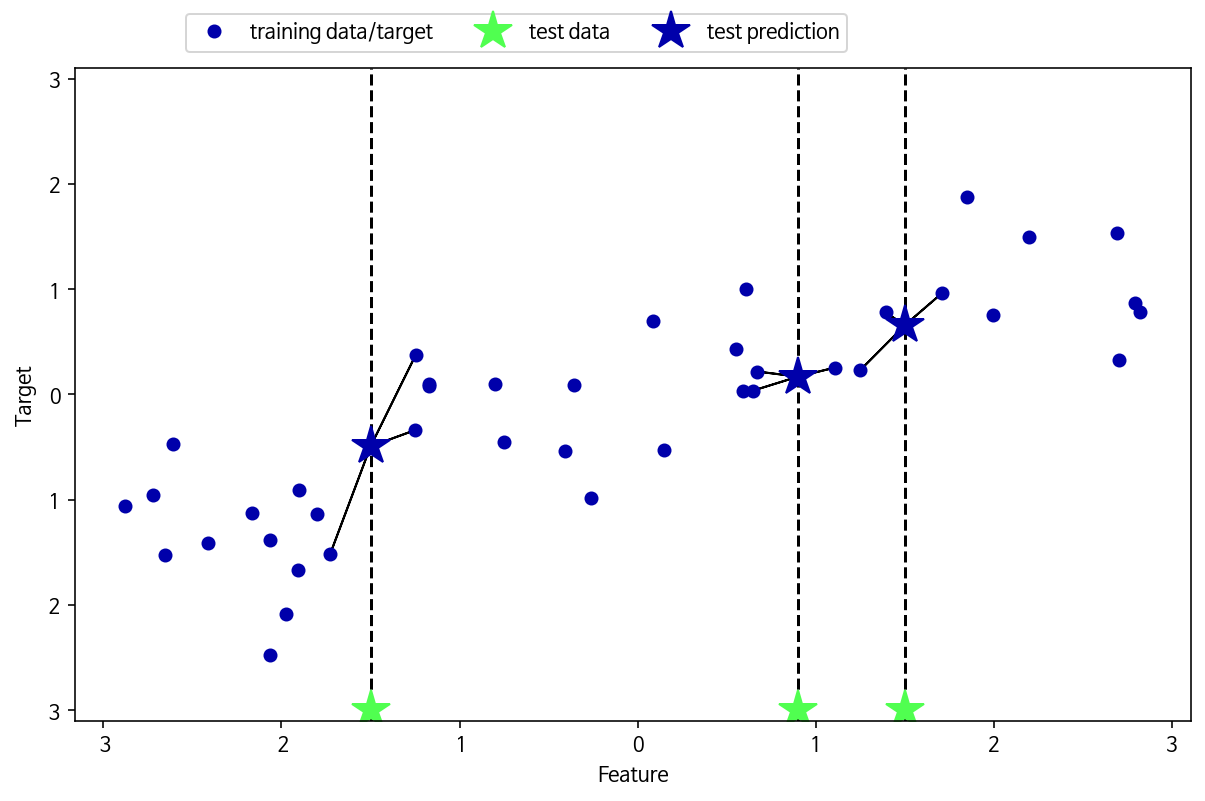

In [ ]:
import mglearn
import matplotlib.pyplot as plt


mglearn.plots.plot_knn_regression(n_neighbors=3)

KNeighborsRegressor()

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_wave(n_samples=9)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

model = KNeighborsRegressor(n_neighbors = 3)
model.fit(X_train, y_train)
model.predict(X_test)

array([-0.04382817, -0.04382817, -0.04382817])

#### K-NN 회귀 실습 01

IMDb 영화 데이터 세트

회귀에 대한 이야기니까 당연히 "평이 좋다" vs "평이 나쁘다" 레이블로 분류하는 게 아니라 <br>
실제 IMDb 등급(별점)을 예측하는 것이 과제의 목표

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# 영화에 대한 3개의 특성
X_train = [
  [0.5, 0.2, 0.1],
  [0.9, 0.7, 0.3],
  [0.4, 0.5, 0.7]
]
# 영화에 대한 별점
y_train = [5.0, 6.8, 9.0]

# 코드작성(모델)
model = KNeighborsRegressor(n_neighbors=3, weights='distance')
model.fit(X_train, y_train)


# 새로운 영화 3건에 대해 별점을 예측
X_test = [
  [0.2, 0.1, 0.7],
  [0.4, 0.7, 0.6],
  [0.5, 0.8, 0.1]
]

# 코드작성(예측)
model.predict(X_test)

array([7.28143288, 7.76451922, 6.8457845 ])

##### weight 가중치 함수 추가설명

예를 들어 
```
영화 : A -> 등급: 5.0 , X까지의 거리: 3.2
영화 : B -> 등급: 6.8 , X까지의 거리: 11.5
영화 : C -> 등급: 9.0 , X까지의 거리: 1.1
```
가 있다고 할 때 

평균을 구하면
> (5.0 + 6.8 + 9.0) / 3 = 6.93

거리에 대한 가중 평균을 구해보면
> (5.0/3.2 + 6.8/11.5 + 9.0/1.1) / (1/3.2 + 1/11.5 + 1/1.1) = 7.9

code
```
print( (5.0 + 6.8 + 9.0) / 3 )
print( (5.0/3.2 + 6.8/11.5 + 9.0/1.1) / (1/3.2 + 1/11.5 + 1/1.1) )
출력
6.933333333333334
7.898546346988861
```

# 지도학습 - 선형회귀 (Linear Regression)

회귀 모델이란?

- 어떤 자료에 대해서 그 값에 영향을 주는 조건을 고려하여 구한 평균 <br>
(어떤 데이터들이 굉장히 크거나 작을지라도 전체적으로 이 데이터들은 전체 평균으로 회귀하려는 특징이 있다는 통계학 기법)
- \\( y = h(x_1, x_2, x_3, ..., x_k; W_1, W_2, W_3, ..., W_k) + \epsilon \\)

 - h() : 조건에 따른 평균을 구하는 함수 (회귀 모델)
 - x : 어떤 조건(특성)
 - W : 각 조건의 영향력(가중치)
 - e : ‘오차항’을 의미. 다양한 현실적인 한계로 인해 발생하는 불확실성으로 일종의 잡음(noise)

선형 모델이란?

- 입력 특성에 대한 선형 함수를 만들어 예측을 수행

- 다양한 선형 모델이 존재

- 분류와 회귀에 모두 사용 가능


<center>

시험성적 데이터

|X ( 학습 시간 )| Y ( 시험 점수 )|
|---|---|
|9 |90|
|8 |80|
|4| 40|
|2| 20|

7시간 공부 할 경우 성적은?
</center>



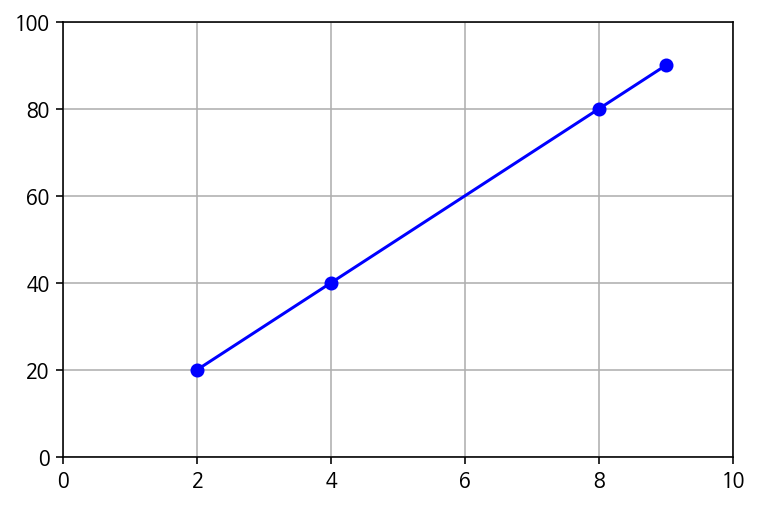

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

x = [9, 8, 4, 2]
y = [90, 80, 40, 20]
plt.xlim(0,10)
plt.ylim(0,100)
plt.plot(x,y, 'b-o')
plt.grid()

 \\( y=ax+b \\)

 - a : 기울기
 - b : 절편


<center>

시험성적 데이터

|X ( 학습 시간 )| Y ( 시험 점수 )|
|---|---|
|8 |97|
|6 |91|
|4| 93|
|2| 81|

7시간 공부 할 경우 성적은?
</center>


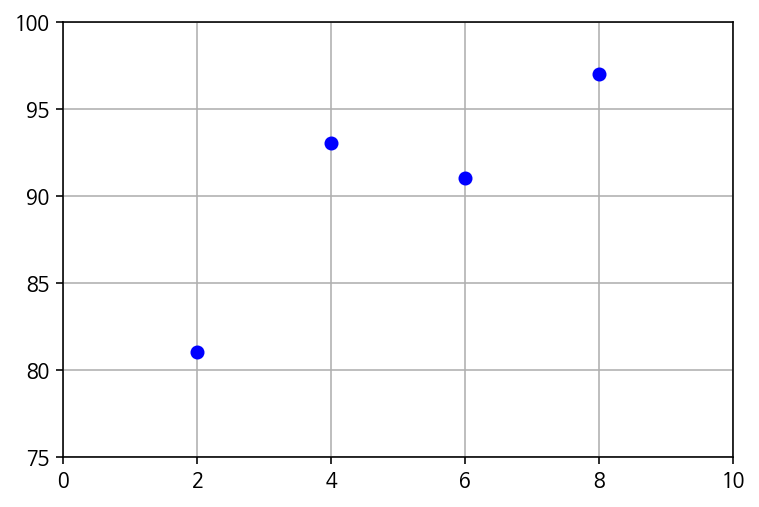

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
x = [8, 6, 4, 2]
y = [97, 91, 93, 81]
plt.xlim(0,10)
plt.ylim(75,100)
plt.plot(x,y, 'bo')
plt.grid()

 \\( y=ax+b \\)

 - a : 기울기
 - b : 절편

최소제곱법

> \\( a=\frac { (x-x평균)(y-y평균)의 합 }{ { (x-x평균) }^{ 2 }의 합 }  \\)

- 공부한 시간(x)의 평균: (2+4+6+8) / 4 = 5
- 성적(y)의 평균: (81+93+91+97) / 4 = 90.5

> \\( b=y의 평균- (x의 평균 \times 기울기 a) \\)

- b = 90.5 - (2.3 x 5) = 79


In [ ]:
a = ( (2-5)*(81-90.5)+(4-5)*(93-90.5)+(6-5)*(91-90.5)+(8-5)*(97-90.5) )  /  ( (2-5)**2 + (4-5)**2 + (6-5)**2 + (8-5)**2 )
a1 = ( (2-5)*(81-90.5)+(4-5)*(93-90.5)+(6-5)*(91-90.5)+(8-5)*(97-90.5) ) 
a2 = ( (2-5)**2 + (4-5)**2 + (6-5)**2 + (8-5)**2 )
a1, a2, a

(46.0, 20, 2.3)

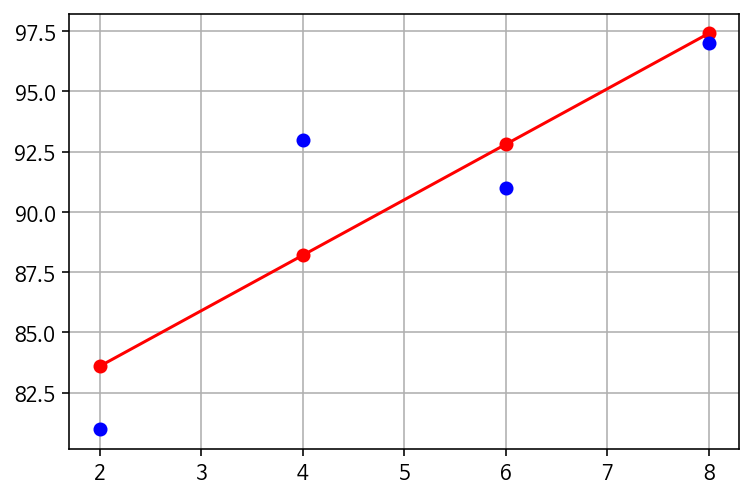

In [ ]:
# 오차가 최저가 되는 직선
import numpy as np
# 기울기 a를 최소제곱법으로 구하는 함수
def compute_a(x, y, mean_x, mean_y):
  #분자부분 :
  dc = 0
  for i in range(len(x)):
    dc += (x[i] - mean_x) * (y[i] - mean_y)


  #분모부분 :
  divisor = 0
  for i in range(len(x)):
    divisor += (x[i]-mean_x)**2
  
  a = dc / divisor
  return a

x = [8, 6, 4, 2]
y = [97, 91, 93, 81]
mean_x = np.mean(x)
mean_y = np.mean(y)
a = compute_a(x, y, mean_x, mean_y)
b = mean_y - (mean_x * a)

y_pred = [ a * x1 + b for x1 in x]

plt.plot(x, y_pred, 'r-o')
plt.plot(x, y, 'bo')
plt.grid()
plt.show()

## 선형회귀(Linear Regression) <br>
 또는 최소제곱법(Ordinary Least Squares)

- 종속변수(응답변수) y와 한 개 이상의 독립변수(입력변수) x와의 상관관계를 모델링한 것

 >  \\( y=Wx+b \\)  
  - (W : 가중치, b : 편향(bias))

 > \\( H(x)=Wx+b \\)  
  - H(x) : Linear 하게 Hypothesis(가설)을 세운다는 것
  - 데이터를 가장 잘 대변할 수 있는 H(x)의 W와 b를 정하는 것이 Linear Regression의 목적

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


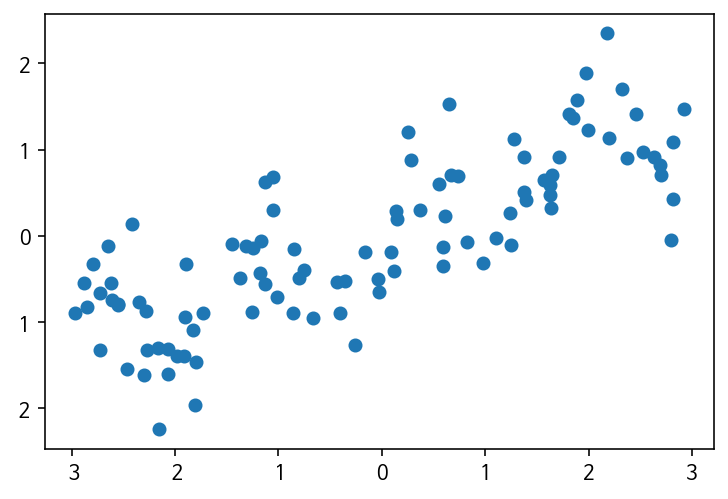

In [ ]:
import numpy as np
import mglearn

X, y = mglearn.datasets.make_wave(100)
plt.scatter(X, y)
plt.show()

w[0]: 0.393906  b: -0.031804


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


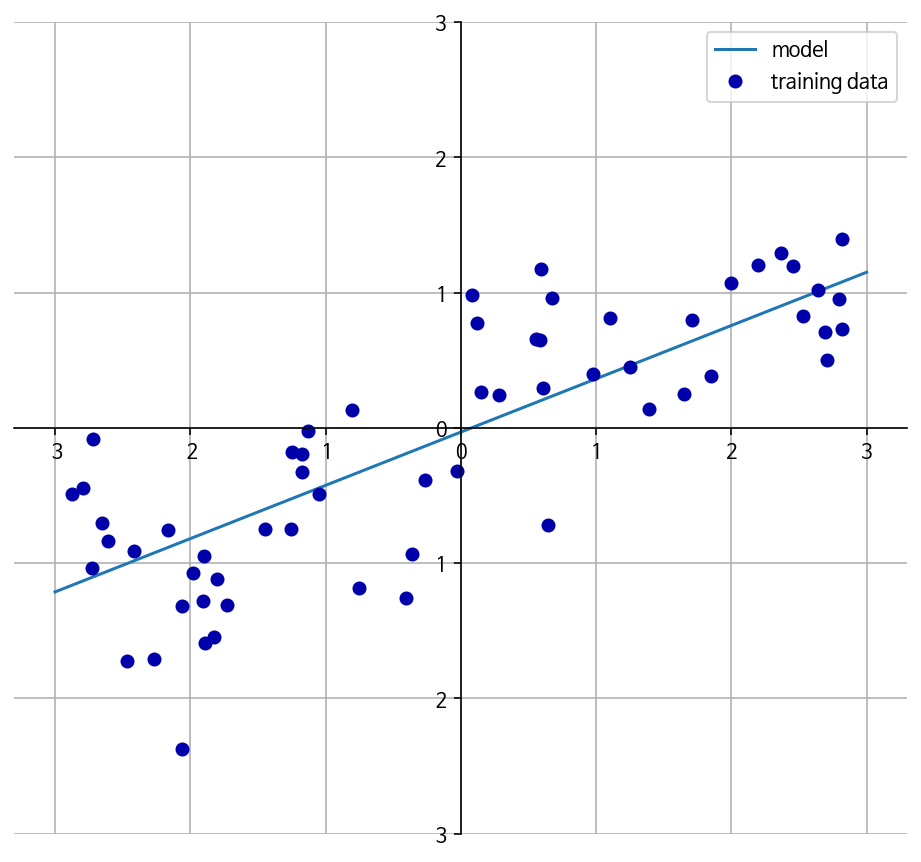

In [ ]:
import mglearn
mglearn.plots.plot_linear_regression_wave()

- 비용함수 (Cost / Cost function) : 그려진 직선 Hypothesis(H(x))와 실제 데이터(y)의 차이

  - Cost = H(x) - y에 데이터를 대입하여 Cost의 총합을 구하는 것이 가능
  - Cost의 총합이 작은 Hypothesis일수록 데이터를 잘 대변하는 훌륭한 Linear Regression
  - Cost는 양수일 수도, 음수일 수도 있기에 이러한 문제를 방지하고자 총합을 구할 때 Cost값을 제곱하여 평균을 내는 방식(평균제곱오차, MSE, Mean Squared Error)을 사용
  >  \\( cost(W,b)=\cfrac { 1 }{ m } \sum _{ i=1 }^{ m } { (H({ x }^{ (i) })-{ y }^{ (i) }) }^{ 2 }  \\)

   > \\( H(x)=Wx+b \\)  

 - 머신러닝(or 딥러닝)에서 learning의 목적은 Cost를 정의하고 이를 최소화하는 것

#### 평균제곱오차 (MSE, Mean Squared Error) - 잘못그은 선 바로잡기

- 실제값과 예측값의 차이를 분석하기 위한 것
- 음수가 존재하는 경우 오차가 줄어드는 문제 -> 자승을 취함
- 평균오차가 자승으로 인해 커지는 문제 -> 제곱근을 취함

|x(hour) | y(score)|
|---|---|
|0|0|
|1|1|
|2|2|
|3|3|

\\( H(x)=1 \times  x+0 \\)  

\\( H(x)=0.5 \times x+0 \\)  

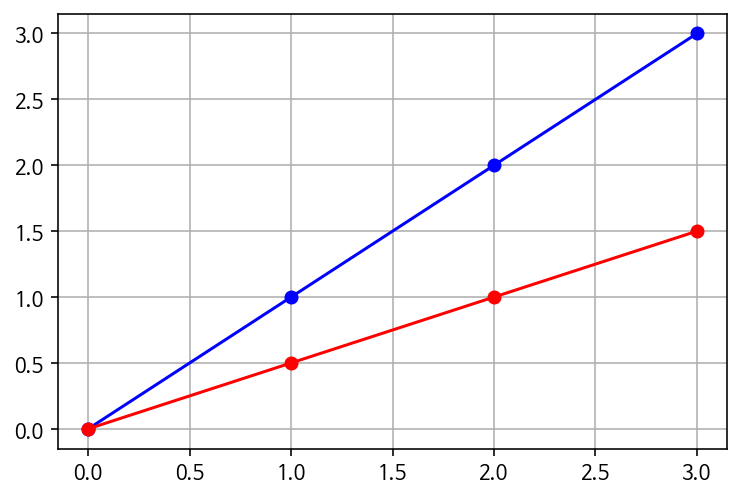

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.array([0, 1, 2, 3])
y = np.array([0, 1, 2, 3])

# 가중치(계수) 및 편향(절편)
w = 1
b = 0
y_pred1 = w * x + b
plt.plot(x, y_pred1, 'b-o')

w = 0.5
b = 0
y_pred2 = w * x + b
plt.plot(x, y_pred2, 'r-o')

plt.grid()
plt.show()

#### 평균제곱오차 (MSE, Mean Squared Error) 연습 01
가설의 MSE 값을 계산해보자.


\\( \cfrac { { (H({ x }^{ (1) })-{ y }^{ (1) }) }^{ 2 } + { (H({ x }^{ (2) })-{ y }^{ (2) }) }^{ 2 }+ { (H({ x }^{ (3) })-{ y }^{ (3) }) }^{ 2 }+ { (H({ x }^{ (4) })-{ y }^{ (4) }) }^{ 2 } }{ 4 } = ? \\)

In [ ]:
# y_pred(예측값), y(실제값)
def MSE(y_pred, y):
  cost = np.sum((y_pred - y)**2) / len(y)
  return cost

MSE(y_pred1, y)     #0.0
MSE(y_pred2, y)     #0.875

0.875

# 3. 빅데이터 분석

### 확률
#### 확률의 정의
* 시행과 사건
  - 사건, 표본공간(S)
    - 근원사건 : 하나의 값만이 나오는 사건
    - AND, OR, NOT : 교집합, 합집합, 차집합
    - 배반사건, 여사건

* 수학적 확률의 정의 : N이 한 시행에 따라서 일어날 수 있는 모든 경우의 수.
Na이 사건 A가 일어나는 경우의 수일 때 수학적 확률(P(A) = Na/N)  

* 확률의 기본성질
  - 임의의 사건 A에 대한 확률은   
  0 <= P(A) <=1 을 충족한다.
  - 근원사건의 확률 pi를 모두 더하면 1이 되어야 한다.   
  즉, 표본공간 S에 대한 확률 P(S) = 1이다.

* 통계적(경험적) 확률의 정의
  - 어떤 조건 아래에서 실험 또는 관측한 자료의 총수를 N이라 하고, 그 중에서 어떤 사건 A가 일어난 횟수를 𝑁𝐴라 할 때 상대도수는 다음과 같이 정의한다:  
상대도수 = 𝑁𝐴 / N
  - 그러면 사건 A가 일어날 통계적 확률은 다음과 같이 상대도수의 극한이다.  
  통계적 확률 = lim(𝑁→∞) NA/N




#### 확률의 덧셈
* OR  
P( 𝐴 ∪ 𝐵 )= 𝑃 (𝐴) + 𝑃(𝐵) − 𝑃(𝐴 ∩ 𝐵)
* 만약 A와 B가 동시에 일어날 수 없는 '배반사건'인 경우, 𝑃(𝐴 ∩ 𝐵) = 0 이며  
𝑃 (𝐴 ∪ 𝐵) = 𝑃 (𝐴) + 𝑃 (B)

#### 확률의 곱셈
* 조건부 확률 (Conditional Probability)
  - 확률이 0이 아닌 사건 A와 B에 대해서 사건 A가 일어났다는 전제로 사건 B가 일어날 확률을 조건부 확률이라 부르며 𝑃(𝐵|𝐴)와 같이 표기한다.   
  𝑃(𝐵|𝐴) = 𝑃(𝐴 ∩ 𝐵) / 𝑃(𝐴)  
  𝑃(𝐴 ∩ 𝐵) = 𝑃(𝐵|𝐴) 𝑃(𝐴)= 𝑃(𝐴|𝐵) 𝑃(B)

* 베이즈 정리 : 확률의 곱셈정리를 이용하여 베이즈 정리를 도출해 낼 수 있다.  
  𝑃(𝐴|𝐵) 𝑃(𝐵) = 𝑃(𝐵|𝐴) 𝑃(𝐴)
  



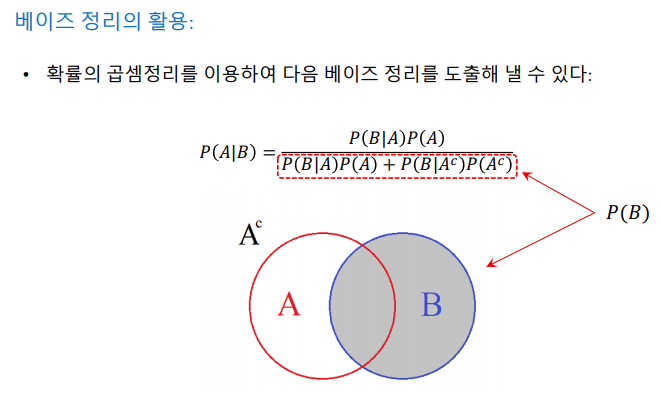

# 4. 취업멘토링

만들고 싶은거..?  
홈페이지?

